Load things

In [1]:
from pathlib import Path
import os

import numpy as np
import pynwb
import datajoint as dj
import nwb_datajoint as nd
from ndx_franklab_novela import Probe

import spiketoolkit as st

import warnings
warnings.simplefilter('ignore')

data_dir = Path('/stelmo/nwb') # CHANGE ME TO THE BASE DIRECTORY FOR DATA STORAGE ON YOUR SYSTEM

os.environ['NWB_DATAJOINT_BASE_DIR'] = str(data_dir)
os.environ['KACHERY_STORAGE_DIR'] = str(data_dir / 'kachery-storage')
os.environ['SPIKE_SORTING_STORAGE_DIR'] = str(data_dir / 'spikesorting')

Connecting kyu@lmf-db.cin.ucsf.edu:3306


Insert data

In [3]:
nwb_file_name = 'Jaq20190826.nwb'
nwb_file_name2 = 'Jaq20190826_.nwb'

In [14]:
nd.insert_sessions(nwb_file_name)

Creating a copy of NWB file Jaq20190826.nwb with link to raw ephys data: Jaq20190826_.nwb
Populate Session...
Institution...
Lab...
LabMember...
Subject...
DataAcquisitionDevice...
CameraDevice...
Inserted ['jaq sleep camera', 'jaq run camera']
Probe...
Skipping Apparatus for now...
IntervalList...
Populate ExperimenterList...
Populate ElectrodeGroup...
Populate Electrode...
Populate Raw...
Estimating sampling rate...
Estimated sampling rate: 30000.0
Importing raw data: Estimated sampling rate:	30000.0 Hz
                    Number of valid intervals:	17
Populate SampleCount...
Populate DIOEvants...
Populate SensorData
Populate TaskEpochs
Populate StateScriptFile
Populate VideoFile
RawPosition...
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sampling rate: 30.0 Hz
Processing raw position data. Estimated sa

Check tables

In [16]:
nd.common.Session() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
Jaq20190826_.nwb,Jaq,"University of California, San Francisco",Loren Frank,jaq_01,Theta and gait,2019-08-26 16:53:47,1970-01-01 00:00:00,Theta and gait


In [17]:
nd.common.IntervalList() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,interval_list_name descriptive name of this interval list,valid_times numpy array with start and end times for each interval
Jaq20190826_.nwb,01_sleep,=BLOB=
Jaq20190826_.nwb,02_lineartrack,=BLOB=
Jaq20190826_.nwb,03_sleep,=BLOB=
Jaq20190826_.nwb,04_lineartrack,=BLOB=
Jaq20190826_.nwb,05_sleep,=BLOB=
Jaq20190826_.nwb,06_lineartrack,=BLOB=
Jaq20190826_.nwb,07_sleep,=BLOB=
Jaq20190826_.nwb,pos 0 valid times,=BLOB=
Jaq20190826_.nwb,pos 1 valid times,=BLOB=
Jaq20190826_.nwb,pos 2 valid times,=BLOB=


In [9]:
(nd.common.ElectrodeGroup & {'nwb_file_name':nwb_file_name2}).fetch("KEY")

[{'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '0'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '1'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '10'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '11'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '12'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '13'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '14'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '15'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '16'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '17'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '18'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '19'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '2'},
 {'nwb_file_name': 'Jaq20190826_.nwb', 'electrode_group_name': '20'},
 {'nwb_file_name': 'Jaq

In [19]:
nd.common.Raw() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,interval_list_name descriptive name of this interval list,raw_object_id the NWB object ID for loading this object from the file,"sampling_rate Sampling rate calculated from data, in Hz",comments,description
Jaq20190826_.nwb,raw data valid times,a59662aa-ebc2-463a-9c2d-68358f6359d6,30000.0,sample comment,Electrical series registered on electrode


Populate SortGroup

In [21]:
nd.common.SortGroup().set_group_by_shank(nwb_file_name2)

About to delete:
Nothing to delete


In [22]:
nd.common.SortGroup() & {'nwb_file_name':nwb_file_name2}

nwb_file_name the name of the NWB file,sort_group_id identifier for a group of electrodes,"sort_reference_electrode_id the electrode to use for reference. -1: no reference, -2: common median"
Jaq20190826_.nwb,0,-1
Jaq20190826_.nwb,1,-1
Jaq20190826_.nwb,2,-1
Jaq20190826_.nwb,3,-1
Jaq20190826_.nwb,4,-1
Jaq20190826_.nwb,5,-1
Jaq20190826_.nwb,6,-1
Jaq20190826_.nwb,7,-1
Jaq20190826_.nwb,8,-1
Jaq20190826_.nwb,9,-1


Load spike sorters and parameters

In [23]:
nd.common.SpikeSorter().insert_from_spikeinterface()
nd.common.SpikeSorterParameters().insert_from_spikeinterface()

In [26]:
nd.common.SpikeSorterParameters()

sorter_name the name of the spike sorting algorithm,parameter_set_name label for this set of parameters,parameter_dict dictionary of parameter names and values
hdsort,default,=BLOB=
herdingspikes,default,=BLOB=
ironclust,default,=BLOB=
kilosort,default,=BLOB=
kilosort2,default,=BLOB=
klusta,default,=BLOB=
mountainsort4,default,=BLOB=
mountainsort4,franklab_mountainsort_20KHz,=BLOB=
spykingcircus,default,=BLOB=
tridesclous,default,=BLOB=


Define spike sorter parameters from default

In [27]:
p = (nd.common.SpikeSorterParameters() & {'sorter_name': 'mountainsort4', 'parameter_set_name' : 'default'}).fetch1()

param = p['parameter_dict']
param['adjacency_radius'] = 100
param['curation'] = False
param['num_workers'] = 4
param['verbose'] = True
param['clip_size'] = 50
param['noise_overlap_threshold'] = 0

nd.common.SpikeSorterParameters().insert1({'sorter_name': 'mountainsort4', \
                                           'parameter_set_name' : 'franklab_mountainsort_30KHz', \
                                           'parameter_dict' : param}, skip_duplicates='True')


In [28]:
nd.common.SpikeSorterParameters()

sorter_name the name of the spike sorting algorithm,parameter_set_name label for this set of parameters,parameter_dict dictionary of parameter names and values
hdsort,default,=BLOB=
herdingspikes,default,=BLOB=
ironclust,default,=BLOB=
kilosort,default,=BLOB=
kilosort2,default,=BLOB=
klusta,default,=BLOB=
mountainsort4,default,=BLOB=
mountainsort4,franklab_mountainsort_20KHz,=BLOB=
mountainsort4,franklab_mountainsort_30KHz,=BLOB=
spykingcircus,default,=BLOB=


Define a sort interval

In [29]:
interval = (nd.common.IntervalList() & {'nwb_file_name' : nwb_file_name2,\
                                  'interval_list_name':'04_lineartrack'†}).fetch1('valid_times')

In [32]:
sort_interval = np.asarray([interval[0][0], interval[0][0]+10])

In [35]:
nd.common.SortInterval().insert1({'nwb_file_name' : nwb_file_name2, 'sort_interval_name' : 'test',\
                                  'sort_interval' : sort_interval},\
                                 skip_duplicates=True)

Define waveform parameters

In [38]:
# create the sorting waveform parameters table
n_noise_waveforms = 1000 # the number of random noise waveforms to save
waveform_param_dict = st.postprocessing.get_waveforms_params()
waveform_param_dict['grouping_property'] = 'group'
# set the window to half of the clip size before and half after
waveform_param_dict['ms_before'] = .75
waveform_param_dict['ms_after'] = .75
waveform_param_dict['dtype'] = 'i2'
waveform_param_dict['verbose'] = False
waveform_param_dict['max_spikes_per_unit'] = 1000
nd.common.SpikeSortingWaveformParameters.insert1({'waveform_parameters_name' : 'franklab default', \
                                                  'n_noise_waveforms' : n_noise_waveforms,\
                                                  'waveform_parameter_dict' : waveform_param_dict}, replace='True')

Define spike sorting parameters (note: this is different from spike sor _ter_ parameters defined above)

In [68]:
key = dict()
key['nwb_file_name'] = nwb_file_name2
key['sort_group_id'] = 3
key['sorter_name'] = 'mountainsort4'
key['parameter_set_name'] = 'franklab_mountainsort_30KHz'
key['sort_interval_name'] = 'test'
key['waveform_parameters_name'] = 'franklab default'
key['interval_list_name'] = '04_lineartrack'

nd.common.SpikeSortingParameters().insert1(key, skip_duplicates='True')

Run spike sorting

In [69]:
nd.common.SpikeSorting().populate()

in spike sorting
writing new NWB file Jaq20190826_000000.nwb
'end_frame' set to 0


AssertionError: 'start_frame' must be less than 'end_frame'!

Troubleshooting

In [70]:
raw_data_obj = (nd.common.Raw() & {'nwb_file_name' : nwb_file_name2}).fetch_nwb()[0]['raw']
timestamps = np.asarray(raw_data_obj.timestamps)

In [71]:
interval

array([[1.56686824e+09, 1.56686914e+09]])

In [77]:
np.searchsorted(timestamps, np.ravel(interval))

array([75488847, 75488847])

In [86]:
timestamps[75488847] - timestamps[75488847-1]

1669.8751361370087

In [87]:
interval[0][1]-interval[0][0]

903.6806597709656

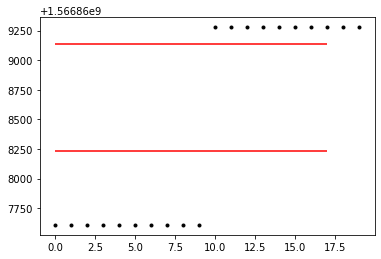

In [135]:
import matplotlib.pyplot as plt

plt.plot(timestamps[75488847-10:75488847+10],'k.')
plt.hlines(interval,xmin=0,xmax=17,color='r')

In [136]:
with pynwb.NWBHDF5IO(path='/stelmo/nwb/Jaq20190826.nwb', mode='r') as io:
    nwbf = io.read()
    samepochs = nwbf.epochs.to_dataframe()
#     epoch_dict = dict()
#     epoch_dict['nwb_file_name'] = nwb_file_name
#     for e in epochs.iterrows():
#         epoch_dict['interval_list_name'] = e[1].tags[0]
#         epoch_dict['valid_times'] = np.asarray([[e[1].start_time, e[1].stop_time]])
#         self.insert1(epoch_dict, skip_duplicates=True)ple_count = nd.common.get_data_interface(nwbf, 'sample_count')


In [148]:
io = pynwb.NWBHDF5IO(path='/stelmo/nwb/Jaq20190826.nwb', mode='r')
nwbf = io.read()

In [191]:
nwbf.intervals['mda_valid_times'].to_dataframe()

,start_time,stop_time
id,,
0,1.566864e+09,1.566864e+09
1,1.566864e+09,1.566865e+09
2,1.566865e+09,1.566865e+09
3,1.566866e+09,1.566866e+09
4,1.566866e+09,1.566867e+09
5,1.566867e+09,1.566867e+09
6,1.566867e+09,1.566868e+09
7,1.566868e+09,1.566868e+09
8,1.566868e+09,1.566868e+09


In [179]:
a = nwbf.intervals['epochs'].to_dataframe()['start_time'][5]

In [182]:
np.searchsorted(timestamps)

75488847

In [145]:
samepochs

,start_time,stop_time,tags
id,,,
0,1.566864e+09,1.566865e+09,[01_sleep]
1,1.566866e+09,1.566868e+09,[03_sleep]
2,1.566869e+09,1.566871e+09,[05_sleep]
3,1.566872e+09,1.566874e+09,[07_sleep]
4,1.566865e+09,1.566866e+09,[02_lineartrack]
5,1.566868e+09,1.566869e+09,[04_lineartrack]
6,1.566871e+09,1.566872e+09,[06_lineartrack]
